# ROC Curves & AUC metrics
Here we use the `roc_curve` and `auc` faciities in scikit learn to plot some AUC curves.  
- For GaussianNB we use the `predict_proba` method to get scores that can be ranked.  
- For SVC we use the `decision_function` method.  

In [13]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [14]:
hotel_rev = pd.read_csv('HotelRevHelpfulness.csv')
hotel_rev.head()

,hotelId,aveHelpfulnessRatioUser,stdevHelpfulnessRatioUser,pcReviewsExceedMinHelpfulnessSupport,numReviewsUser,numReviewsHotel,ratingUser,numberSubRatingsUser,subRatingMeanUser,subRatingStdevUser,...,completeness_2,completeness_3,numberTermsEntry,percentageAlphaCharsEntry,fractionUpperCaseCharsEntry,fractionYouVsIEntry,numberTermsSummaryQuote,percentageAlphaCharsSummaryQuote,fractionUpperCaseCharsSummaryQuote,reviewHelpfulness
0,17420,1.000000,0.000000,0.666667,3,16,5,4,4.000000,0.000000,...,0,1,182,0.788474,0.025703,0.500000,6,0.815789,0.096774,1
1,1397,0.772487,0.377321,0.500000,12,233,5,0,0.000000,0.000000,...,0,0,158,0.791888,0.012594,0.500000,1,1.000000,0.083333,1
2,1348,0.715473,0.300437,0.833333,12,302,4,7,3.714286,0.755929,...,0,3,59,0.799639,0.024831,0.333333,4,0.828571,0.034483,0
3,5940,0.521250,0.481675,0.222222,36,6,1,4,1.000000,0.000000,...,0,0,95,0.782212,0.029155,0.500000,2,0.800000,0.062500,0
4,38,0.603175,0.246926,1.000000,2,271,3,0,0.000000,0.000000,...,0,0,43,0.805128,0.028662,0.000000,1,1.000000,0.142857,0


In [15]:
y = hotel_rev.pop('reviewHelpfulness').values
X = hotel_rev.values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=0, test_size=1/3)

In [16]:
gnb = GaussianNB()
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)
fprG, tprG, t = roc_curve(y_test, y_score[:,1])
roc_aucG = auc(fprG, tprG)

In [17]:
svm = SVC(kernel = 'linear',C=1, probability=True)
hotel_rev_SVM = svm.fit(X_train, y_train)

In [18]:
y_score = hotel_rev_SVM.decision_function(X_test)
fprS, tprS, t = roc_curve(y_test, y_score)
roc_aucS = auc(fprS, tprS)

## The ROC Plot

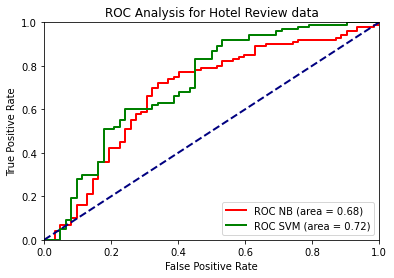

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprS, tprS, color='green',
         lw=lw, label='ROC SVM (area = %0.2f)' % roc_aucS)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Hotel Review data')
plt.legend(loc="lower right")
plt.show()